In [60]:
!pip install jsons

In [61]:
import pandas as pd
import os
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from scipy import spatial
import warnings
warnings.filterwarnings('ignore')
import jsons

In [15]:
df_data = pd.read_csv('tracks.csv')

In [16]:
sorted_df = df_data.sort_values('popularity', ascending = False).head(100)
sorted_two_df = df_data.sort_values('popularity', ascending = True)
date = list(df_data.release_date)
for i in range(len(date)):
    date[i] = int(date[i][:4])

In [17]:
df_data['Year'] = date

In [18]:
df_pre90 = df_data[df_data.Year <= 1990]
df_post_90 = df_data[df_data.Year > 1990]

In [19]:
sorted_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4


In [20]:
sorted_df_1 = sorted_df[['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence' ]]
sorted_two_df = sorted_two_df[['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence' ]]

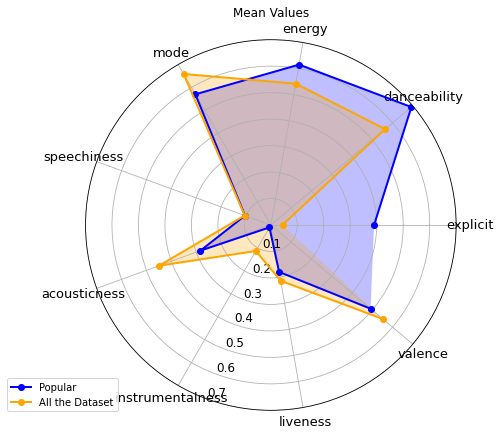

In [21]:
labels = list(sorted_df_1)[:]
stats = sorted_df_1.mean().tolist()
stats2 = sorted_two_df.mean().tolist()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "Popular", color= 'blue')
ax.fill(angles, stats, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7'  ], size=12)
plt.ylim(0,0.7)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "All the Dataset", color= 'orange')
ax.fill(angles, stats2, alpha=0.25, facecolor='orange')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

In [22]:
list_songs = list(sorted_df.name)
spatial.distance.cosine(sorted_df_1.iloc[1], sorted_df_1.iloc[0])

0.06722006900223576

In [23]:
dict_edges = {}
for i in range(len(list_songs)):
    list_val = []
    for j in range(i):
        a_row = list(sorted_df_1.iloc[j])
        list_val.append([j, 1 - spatial.distance.cosine(sorted_df_1.iloc[i], a_row),list(sorted_df.iloc[j])[1] ])
    for j in range(i+1,len(list_songs)):    
        a_row = list(sorted_df_1.iloc[j])
        list_val.append([j, 1 - spatial.distance.cosine(sorted_df_1.iloc[i], a_row), list(sorted_df.iloc[j])[1]])
    dict_edges[i] = list_val

In [24]:
dict_edges[0][1]

[2, 0.624587378766394, 'Astronaut In The Ocean']

In [25]:
new_dict = {}
for i in range(100):
    list_to_put = []
    for j in range(len(dict_edges[i])):
        if dict_edges[i][j][1] >= 0.95:
            list_to_put.append(dict_edges[i][j])      
    new_dict[i] = list_to_put

In [26]:
new_dict[6]

[[5, 0.9560293750509065, 'Leave The Door Open'],
 [9, 0.9617853833264152, 'Bandido'],
 [10,
  0.9543247062808949,
  'Friday (feat. Mufasa & Hypeman) - Dopamine Re-Edit'],
 [15, 0.9618532617779112, 'LA NOCHE DE ANOCHE'],
 [24, 0.975378085973775, 'Watermelon Sugar'],
 [34, 0.9825310864278127, 'Your Love (9PM)'],
 [36, 0.9698599391328867, "We're Good"],
 [42, 0.9966740678817692, 'Sweater Weather'],
 [45, 0.9615933691766522, 'Anyone'],
 [47, 0.9637384203440083, 'Beautiful Mistakes (feat. Megan Thee Stallion)'],
 [48, 0.9514504337674509, 'Baila Conmigo (with Rauw Alejandro)'],
 [58, 0.9786201789244624, 'Life Goes On'],
 [62, 0.9790768610231424, 'Circles'],
 [75, 0.9626145705580303, 'Film out'],
 [77, 0.9863620286062014, 'Adore You'],
 [85, 0.9745729782766279, 'Do I Wanna Know?'],
 [88, 0.9661079822199794, 'Holy (feat. Chance The Rapper)']]

In [27]:
G = nx.Graph()
for i in range(100):
    for j in range(len(new_dict[i])):
        G.add_node(i,label = i)
        G.add_edge(i, new_dict[i][j][0], weight=new_dict[i][j][1], title = new_dict[i][j][2])

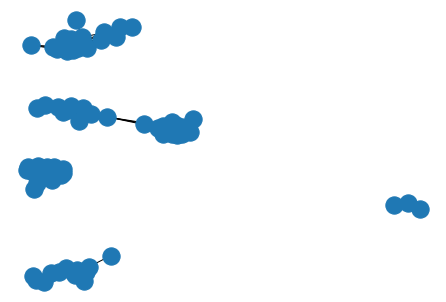

In [28]:
import matplotlib.pyplot as plt

nx.draw(G)

In [29]:
max_deg = 0
node = 0
for n in G.nodes():
    if G.degree[n] > max_deg:
        max_deg = G.degree[n]
        node = n
print(max_deg, node)

23 55


In [30]:
sum_d = 0
for n in G.nodes():
    sum_d += G.degree[n]
sum_d/len(G.nodes())

12.494845360824742

In [31]:
len(G.nodes())

97

In [32]:
sorted_df.iloc[55]

id                      20McUFi8KCIVdNDLrkTDuZ
name                                Goosebumps
popularity                                  89
duration_ms                             163208
explicit                                     1
artists                               ['HVME']
id_artists          ['2o08sCWF5yyo2G4DCiT7T9']
release_date                        2020-06-12
danceability                             0.767
energy                                   0.659
key                                          1
loudness                                -7.429
mode                                         1
speechiness                             0.0444
acousticness                             0.325
instrumentalness                             0
liveness                                  0.13
valence                                  0.439
tempo                                  124.946
time_signature                               4
Name: 92871, dtype: object

In [33]:
ed = G.edges(3, data = True)
H = nx.Graph()
for i in ed:
    H.add_edge(3, i[1], weight = i[2]['weight'], title = i[2]['title'] )

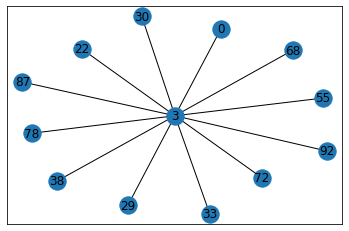

In [34]:
nx.draw_networkx(H, with_labels = True)

In [35]:
for i in ed:
    print(i[2]['title'])

Peaches (feat. Daniel Caesar & Giveon)
Save Your Tears
Save Your Tears
Save Your Tears
Save Your Tears
Save Your Tears
Save Your Tears
Save Your Tears
Save Your Tears
Save Your Tears
Save Your Tears
Save Your Tears


In [36]:
sorted_df_1.head()

,explicit,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence
93802,1,0.677,0.696,1,0.1190,0.3210,0.000000,0.420,0.464
93803,1,0.585,0.436,1,0.0601,0.7210,0.000013,0.105,0.132
93804,0,0.778,0.695,0,0.0913,0.1750,0.000000,0.150,0.472
92810,1,0.680,0.826,1,0.0309,0.0212,0.000012,0.543,0.644
92811,0,0.653,0.524,0,0.0502,0.1120,0.000000,0.203,0.553


In [37]:
import random
from random import randint

In [38]:
value = randint(0,10)
already_picked = []
for i in range(100):
    value = randint(100,586672)
    already_picked.append(value)

df = pd.DataFrame(columns=['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence'])
for i in range(len(already_picked)):  
    df = df.append({'explicit':sorted_two_df.iloc[i, 0], 'danceability':sorted_two_df.iloc[i, 1], 'energy':sorted_two_df.iloc[i, 2], 'mode':sorted_two_df.iloc[i, 3], 'speechiness':sorted_two_df.iloc[i, 4], 'acousticness':sorted_two_df.iloc[i, 5], 'instrumentalness':sorted_two_df.iloc[i, 6], 'liveness':sorted_two_df.iloc[i, 7], 'valence':sorted_two_df.iloc[i, 8] }, ignore_index=True)
df['From_All'] = [1 for i in range(len(df.index))]

In [39]:
sorted_df_1['From_All'] =  [0 for i in range(len(sorted_df_1.index))]

<ipython-input-39-e3e44b6c56ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sorted_df_1['From_All'] =  [0 for i in range(len(sorted_df_1.index))]


In [40]:
sorted_df_1 = sorted_df_1.append(df)
sorted_df_1.head()

,explicit,danceability,energy,mode,speechiness,acousticness,instrumentalness,liveness,valence,From_All
93802,1.0,0.677,0.696,1.0,0.1190,0.3210,0.000000,0.420,0.464,0
93803,1.0,0.585,0.436,1.0,0.0601,0.7210,0.000013,0.105,0.132,0
93804,0.0,0.778,0.695,0.0,0.0913,0.1750,0.000000,0.150,0.472,0
92810,1.0,0.680,0.826,1.0,0.0309,0.0212,0.000012,0.543,0.644,0
92811,0.0,0.653,0.524,0.0,0.0502,0.1120,0.000000,0.203,0.553,0


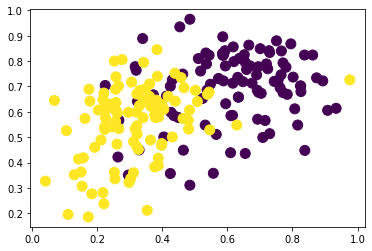

In [41]:
plt.scatter(sorted_df_1.energy, sorted_df_1.danceability, s=100, c=sorted_df_1.From_All, label='From_All')

In [42]:
my_rho = np.corrcoef(sorted_df_1.energy[sorted_df_1.From_All == 1], sorted_df_1[sorted_df_1.From_All == 1].danceability)
my_rho_2 = np.corrcoef(sorted_df_1.energy[sorted_df_1.From_All == 0], sorted_df_1[sorted_df_1.From_All == 0].danceability)
print(my_rho,my_rho_2)

[[1.         0.35156523]
 [0.35156523 1.        ]] [[1.         0.20520467]
 [0.20520467 1.        ]]


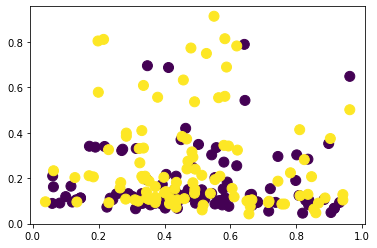

In [43]:
plt.scatter(sorted_df_1.valence, sorted_df_1.liveness, s=100, c=sorted_df_1.From_All)

In [44]:
my_rho = np.corrcoef(sorted_df_1.valence[sorted_df_1.From_All == 1], sorted_df_1[sorted_df_1.From_All == 1].liveness)
my_rho_2 = np.corrcoef(sorted_df_1.valence[sorted_df_1.From_All == 0], sorted_df_1[sorted_df_1.From_All == 0].liveness)
my_rho

array([[ 1.        , -0.09403765],
       [-0.09403765,  1.        ]])

In [45]:
my_rho_2

array([[1.        , 0.02555036],
       [0.02555036, 1.        ]])

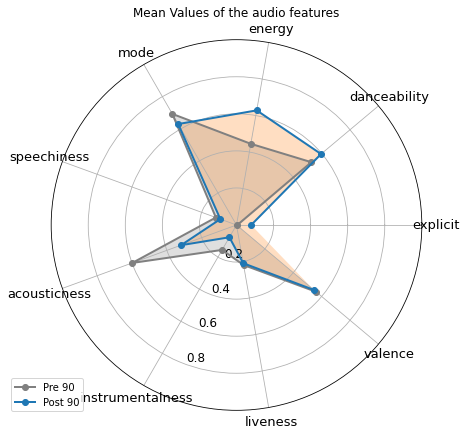

In [46]:
df_pre90 = df_pre90[['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence' ]]
df_post_90 = df_post_90[['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence' ]]

labels = list(df_pre90)[:]
stats = df_pre90.mean().tolist()
stats2 = df_post_90.mean().tolist()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)

# close the plot
#stats = np.concatenate((stats,[stats[0]]))
#stats2 = np.concatenate((stats2,[stats2[0]])) 
#angles = np.concatenate((angles,[angles[0]]))

#Size of the figure
fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label = "Pre 90", color= 'gray')
ax.fill(angles, stats, alpha=0.25, facecolor='gray')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.2 , 0.4 , 0.6 , 0.8  ], ["0.2",'0.4', "0.6", "0.8"], size=12)
plt.ylim(0,1)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "Post 90")
ax.fill(angles, stats2, alpha=0.25)
ax.set_title('Mean Values of the audio features')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

In [47]:
from collections import Counter
import re

In [48]:
sorted_df.artists.values[0] = sorted_df.artists.values[0].replace('[', '')
sorted_df.artists.values[0] = sorted_df.artists.values[0].replace(']', '')
sorted_df.artists.values[0]

r1 = re.compile(r"\w{1,20}.\w{1,20}", re.MULTILINE | re.DOTALL)
r = r1.findall(sorted_df.artists.values[0])

In [49]:
type(r)

list

In [50]:
list_top_100 = list(sorted_df.artists.values)
all_artists = []
for i in range(len(list_top_100)):
    r1 = re.compile(r"\w{1,20}.\w{1,20}", re.MULTILINE | re.DOTALL)
    r = r1.findall(list_top_100[i])
    if len(r) > 0:
        all_artists.append(r[0])

In [51]:
c = Counter(all_artists)
list(c)[:10]

['Justin Bieber',
 'Olivia Rodrigo',
 'Masked Wolf',
 'The Weeknd',
 'Kali Uchis',
 'Bruno Mars',
 'Tiësto',
 'Giveon',
 'Myke Towers',
 'Riton']

In [52]:
list(c.values())

[5,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 3,
 1,
 1,
 2,
 1,
 4,
 4,
 1,
 3,
 1,
 1,
 2,
 1,
 2,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1]

In [53]:
df_artists = pd.DataFrame(data = {'Name':list(c)[:20], 'Count':list(c.values())[:20]})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Justin Bieber'),
  Text(1, 0, 'Olivia Rodrigo'),
  Text(2, 0, 'Masked Wolf'),
  Text(3, 0, 'The Weeknd'),
  Text(4, 0, 'Kali Uchis'),
  Text(5, 0, 'Bruno Mars'),
  Text(6, 0, 'Tiësto'),
  Text(7, 0, 'Giveon'),
  Text(8, 0, 'Myke Towers'),
  Text(9, 0, 'Riton'),
  Text(10, 0, 'Los Legendarios'),
  Text(11, 0, 'Doja Cat'),
  Text(12, 0, 'The Kid'),
  Text(13, 0, 'SZA'),
  Text(14, 0, 'Bad Bunny'),
  Text(15, 0, 'Nathan Evans'),
  Text(16, 0, 'Ariana Grande'),
  Text(17, 0, 'Boza'),
  Text(18, 0, 'MEDUZA'),
  Text(19, 0, 'Cardi B')])

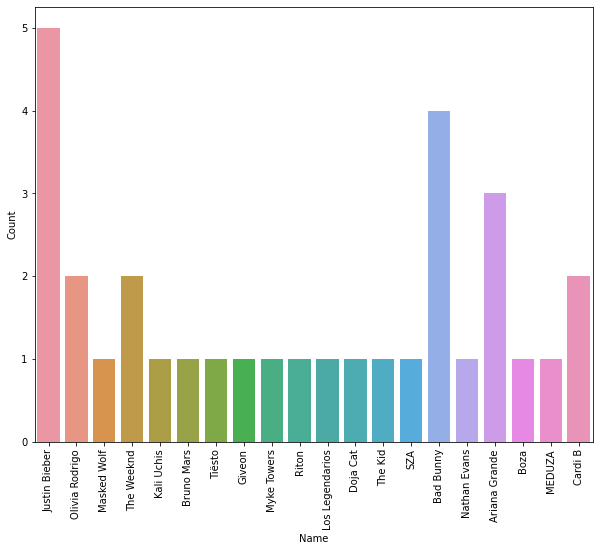

In [54]:
fig = plt.figure(figsize = (10,8))
sns.barplot(x = 'Name', y = 'Count', data = df_artists)
plt.xticks(rotation=90)

In [55]:
client_access_token= 'https://api.genius.com/oauth/authorize'

In [56]:
import lyricsgenius

In [57]:
genius = lyricsgenius.Genius(client_access_token)

In [58]:
song = LyricsGenius.search_song("Missy Elliott", "Work It")

NameError: name 'LyricsGenius' is not defined

In [ ]:
song.lyrics


In [ ]:
building a list of lists, with each element having Artist_Name and Song_Name:
list_artists_songs = []
lyrics_each = []

In [ ]:
songs_list =  list(df_data.name)
artists_list = list(df_data.artists)

In [ ]:
print(len(songs_list), len(artists_list))


In [ ]:
for i in range(len(songs_list)):
    r1 = re.compile(r"\w{1,20}.\w{1,20}", re.MULTILINE | re.DOTALL)
    r = r1.findall(artists_list[i])
    if len(r) > 0:
        for j in r:
            list_artists_songs.append([songs_list[i], j])

In [ ]:
print(len(list_artists_songs))


In [ ]:
already_chosen = list(pd.read_csv("ChosenAlready").Numbers)


In [ ]:
#make these randomly selected
for i in range(200):
    value = randint(0,915191)
    if value not in already_chosen:
        already_chosen.append(value)
        song = LyricsGenius.search_song(list_artists_songs[value][1], list_artists_songs[value][0])
        if song != None:
            lyrics_each.append(song.lyrics)

In [ ]:

df_old_lyrics_l = list(pd.read_csv('283_SONGS').Text)
new_lyrics = df_old_lyrics_l + lyrics_each

In [ ]:
print(len(new_lyrics))


In [ ]:

df_already = pd.DataFrame(data = {'Numbers': already_chosen})
df_already.to_csv('ChosenAlready', index = False)

In [ ]:
df_lyrics = pd.DataFrame(data = {'Text': df_old_lyrics_l})
df_lyrics.to_csv('400 Songs', index = True)

In [ ]:
df_read_lyrics = pd.read_csv('400 Songs')


In [ ]:
df_read_lyrics.head()


In [ ]:
import sys
from textblob import TextBlob


In [ ]:
w = TextBlob(str(df_read_lyrics.iloc[0].Text))


In [ ]:
w.sentiment.polarity


In [ ]:
list_polarities = []
for i in range(len(df_read_lyrics.index)):
    w = TextBlob(str(df_read_lyrics.iloc[i].Text))
    list_polarities.append(w.sentiment.polarity)
    print(len(w))

In [ ]:
pol = pd.DataFrame(data = {'Polarity':list_polarities})
np.mean(list_polarities)


In [ ]:
pol.head()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.boxplot(x = 'From_All', y = 'valence', data = sorted_df_1)

fig, ax = plt.subplots(figsize=(8,  8))
pol.boxplot('Polarity')

In [ ]:
w = TextBlob(str(df_read_lyrics.iloc[7].Text))
w.tags

In [ ]:
n_perc = []
plural_perc = []
reg_ad_perc = []
comp_ad_perc = []
super_ad_perc = []
verb_perc = []

for i in range(len(df_read_lyrics.index)):
    nouns_count = 0
    plural = 0
    reg_adv = 0
    comp_adv = 0 
    super_adv = 0
    verb = 0
    w = TextBlob(str(df_read_lyrics.iloc[i].Text))
    if len(w.tags) <= 10000:
        for j in range(len(w.tags)):
            if w.tags[j][1] == 'NN':
                nouns_count += 1
            if w.tags[j][1] == 'NNS':
                plural += 1
            if w.tags[j][1] == 'RB':
                reg_adv += 1
            if w.tags[j][1] == 'RBS':
                super_adv += 1
            if w.tags[j][1] == 'RBR':
                comp_adv += 1 
            if w.tags[j][1] == 'VB':
                verb += 1  
        print(i, 'Processed')        
        n_perc.append(nouns_count/len(w.tags)) 
        plural_perc.append(plural/len(w.tags)) 
        reg_ad_perc.append(reg_adv/len(w.tags)) 
        comp_ad_perc.append(comp_adv/len(w.tags)) 
        super_ad_perc.append(super_adv/len(w.tags)) 
        verb_perc.append(verb/len(w.tags))

In [ ]:
len(n_perc)


In [ ]:
poly = pd.DataFrame(data = {'Noun_singular':n_perc})


In [ ]:
poly['Noun_singular'] = n_perc
poly['Noun_plural'] = plural_perc
poly['Regular_ad'] = reg_ad_perc
poly['Comp_ad'] = comp_ad_perc
poly['Super_ad'] = super_ad_perc
poly['Verb'] = verb_perc

In [ ]:
poly.to_csv('Metrics', index = True)


In [ ]:
poly = pd.read_csv('Metrics')


In [ ]:
poly.head()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,  9))
poly.boxplot(['Noun_singular', 'Noun_plural', 'Regular_ad', 'Verb'])